In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import PTA

simulation_file = "example_data/MG-Snakes/MG-Snakes-SIMOUT.csv"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
PTA.plotting.plot_simulations_pca(simulation_file, target="t_s")


<AxesSubplot: xlabel='Variance explained 77.3%', ylabel='Variance explained 4.38%'>

In [4]:
import pandas as pd
# This file had zeta_e = 8
#dat = pd.read_csv("sim-empirical-msfs.txt", sep=" ")
dat = "example_data/MG-Snakes/sim-empirical-msfs-z_e-8.txt"

In [8]:
%%time
## GB is slow, 4 minutes. RF is really fast ~10 seconds. AB is bad.
cla = PTA.inference.Classifier(dat, simulation_file)
cla.predict(verbose=True)

Predict() started: 2022-12-31 23:15:47.312798
Predict() finished: 2022-12-31 23:16:09.530895
CPU times: user 22.3 s, sys: 48.3 ms, total: 22.3 s
Wall time: 22.6 s


(          zeta_e
 estimate      10,
           0     1    2     3     4     5     6     7     8     9   ...    12  \
 zeta_e  0.01  0.03  0.0  0.01  0.04  0.06  0.04  0.07  0.06  0.06  ...  0.02   
 
           13    14    15    16    17    18    19    20    21  
 zeta_e  0.09  0.09  0.01  0.05  0.03  0.09  0.01  0.04  0.02  
 
 [1 rows x 22 columns])

<BarContainer object of 22 artists>

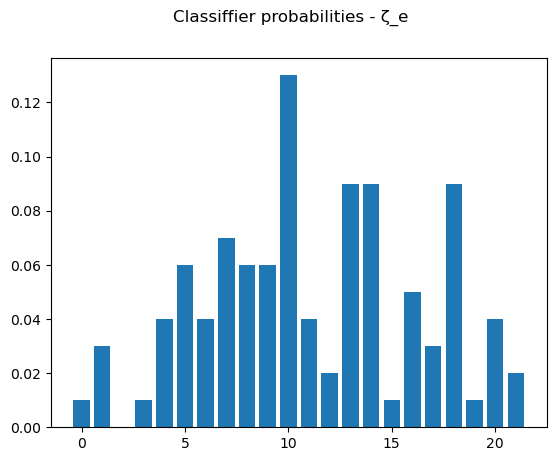

In [12]:
import matplotlib.pyplot as plt
#cla.empirical_proba.plot.bar()
#probs = cla.empirical_proba.values[0]
#wat = plt.bar(x=range(len(probs)), height=probs)
cla.plot()
#plt.title("watdo")


In [ ]:
## RF cross validation

In [5]:
%%time
cla.cross_val_predict(cv=2)

CPU times: user 22.4 s, sys: 433 ms, total: 22.8 s
Wall time: 23.2 s


,zeta_e
0,1
1,19
2,7
3,6
4,9
...,...
49995,2
49996,19
49997,2
49998,2


<AxesSubplot: xlabel='Predicted ζ_e', ylabel='True ζ_e'>

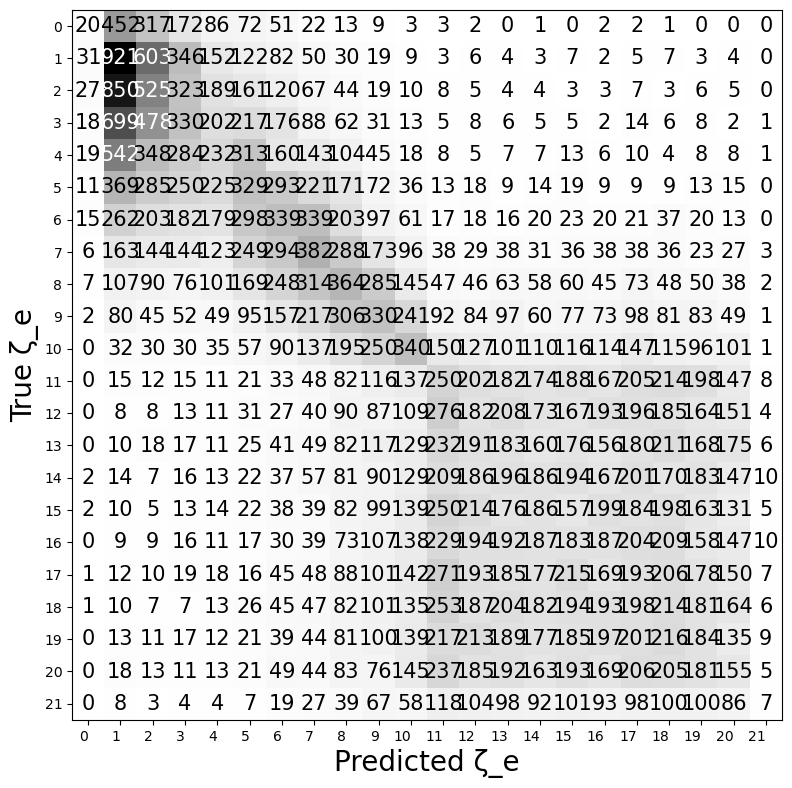

In [8]:
## RF 50K sims w/o param_search
## Doesn't get much better w/ 50K and it's starting to push memory limits
cla.plot_confusion_matrix()

In [ ]:
## RF

<AxesSubplot: xlabel='Predicted ζ_e', ylabel='True ζ_e'>

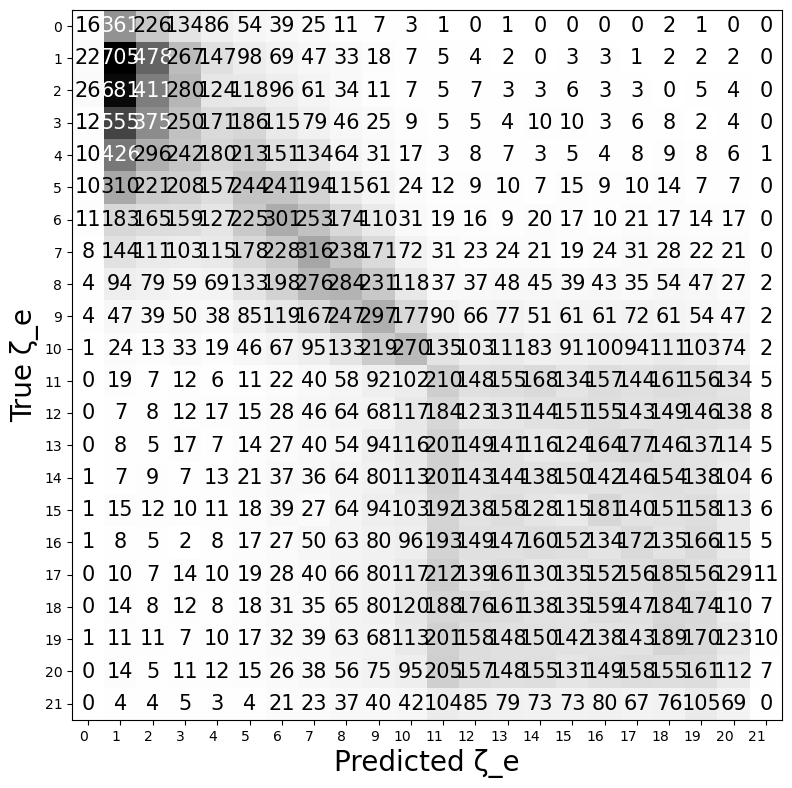

In [17]:
## RF 40K sims w/o param_search
cla.plot_confusion_matrix()

<AxesSubplot: xlabel='Predicted ζ_e', ylabel='True ζ_e'>

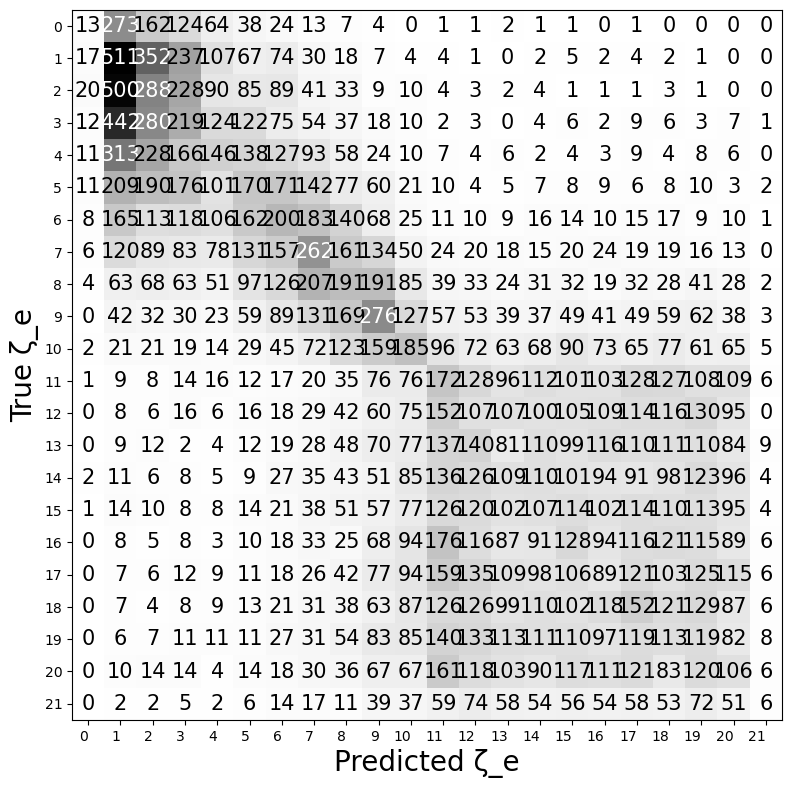

In [11]:
## RF 30K sims w/o param_search
cla.plot_confusion_matrix()

<AxesSubplot: xlabel='Predicted ζ_e', ylabel='True ζ_e'>

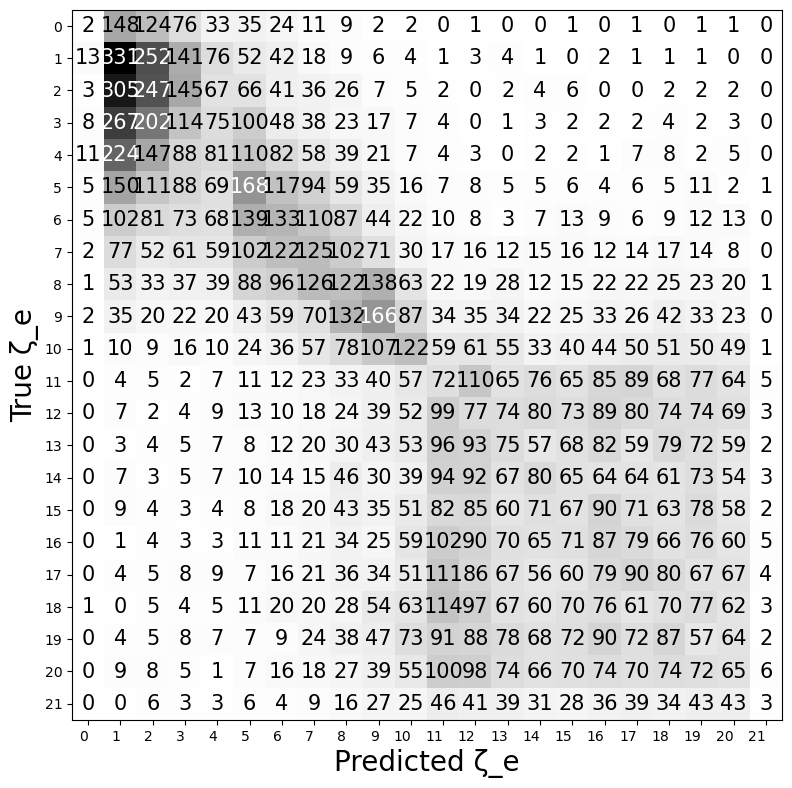

In [8]:
## RF 20K sims without param_search 
cla.plot_confusion_matrix()

In [ ]:
## GB

<AxesSubplot: xlabel='Predicted ζ_e', ylabel='True ζ_e'>

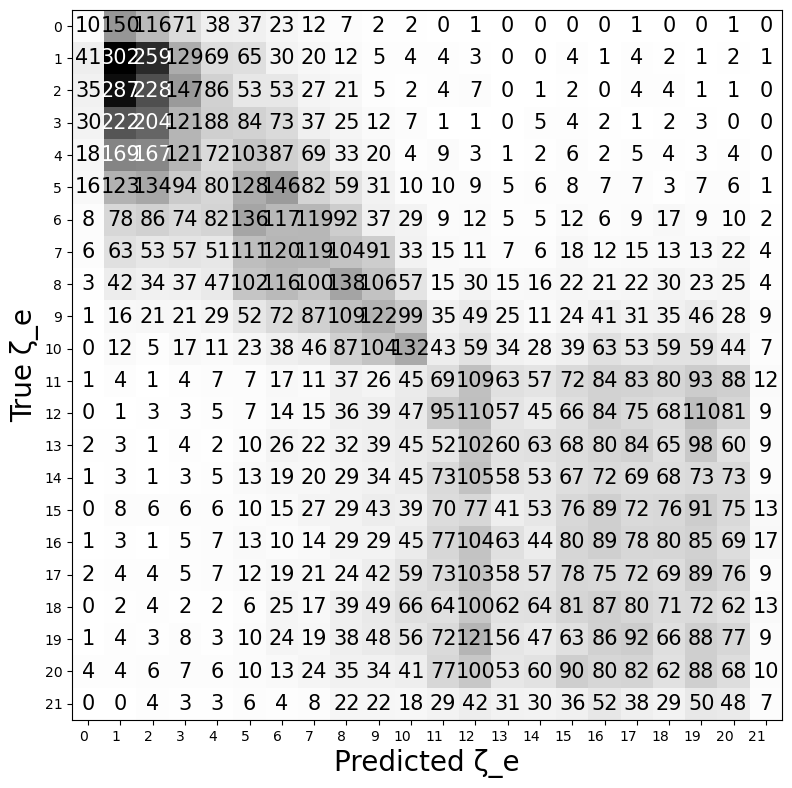

In [8]:
## GB 20k sims
cla.plot_confusion_matrix()

In [ ]:
## AB

<AxesSubplot: xlabel='Predicted ζ_e', ylabel='True ζ_e'>

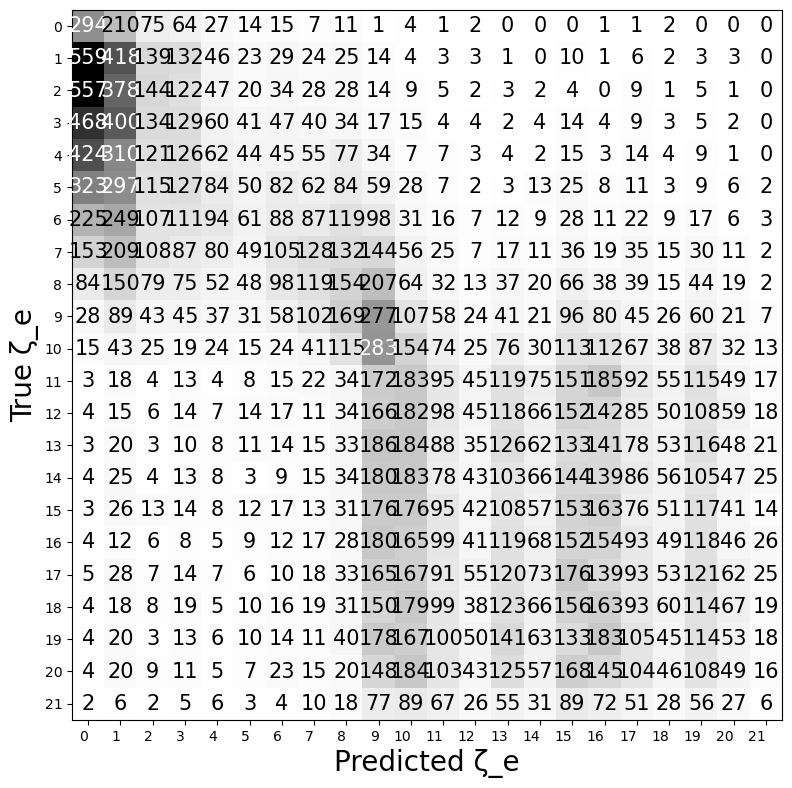

In [14]:
## AB 30k sims
cla.plot_confusion_matrix()

In [24]:
sims = pd.read_csv("default_PTA/MG-Snakes-SIMOUT.csv", sep=" ")
zetas = sims["zeta_e"]
# Learned by experimentation
msfs_idx = 23
msfss = sims.iloc[:, msfs_idx:]
for idx in range(len(msfss)):
    msfs = msfss.iloc[idx]
    break

20 pop0-[[5_1]]     78
pop0-[[4_2]]     54
pop0-[[3_3]]     30
pop1-[[5_1]]     75
pop1-[[4_2]]     49
                 ..
pop19-[[4_2]]    30
pop19-[[3_3]]     9
pop20-[[5_1]]    49
pop20-[[4_2]]    20
pop20-[[3_3]]     7
Name: 0, Length: 63, dtype: int64


In [30]:
with open("zeta-values.txt", 'w') as outfile:
    outfile.write("idx\tzeta_e\n")
    outfile.write("\n".join(["{idx}\t{zeta}".format(idx=idx, zeta=zeta) for idx, zeta in enumerate(zetas.values)]))

In [43]:
for idx in range(len(msfss)):
    msfs = pd.DataFrame(msfss.iloc[idx])
    msfs.T.to_csv("sim-empirical-msfs/sim-empirical-msfs-{idx}.csv".format(idx=idx), index=False, sep=" ")

In [7]:
f = "example_data/MG-Snakes/sim-empirical-msfs-z_e-8.txt"
dat = pd.read_csv(f, sep=" ")
dat.values[0]

array([88, 52, 24, 80, 47, 23, 80, 47, 21, 77, 45, 20, 72, 44, 19, 71, 43,
       19, 71, 42, 18, 71, 41, 17, 70, 39, 17, 68, 39, 17, 65, 37, 17, 64,
       37, 16, 64, 37, 16, 64, 36, 15, 60, 36, 15, 56, 36, 14, 55, 34, 13,
       52, 34, 12, 48, 30, 12, 46, 27,  9, 38, 24,  6])

In [ ]:
## Regression CV

In [6]:
%%time
msfs = "example_data/MG-Snakes/sim-empirical-msfs-z_e-8.txt"
rgr = PTA.inference.Regressor(msfs, simulation_file)
rgr.predict()
#rgr.cross_val_predict(cv=3)

CPU times: user 2min 18s, sys: 656 ms, total: 2min 19s
Wall time: 2min 20s


,t_s,omega,taus_mean
estimate,0.39516,0.11115,0.5636


In [8]:
%%time
rgr.cross_val_predict(cv=3)


,t_s,omega,taus_mean
0,0.82694,0.09548,0.76045
1,0.51228,0.05858,0.59671
2,0.47261,0.09884,0.63364
3,0.79327,0.08719,0.77532
4,1.02380,0.04952,0.92549
...,...,...,...
49995,0.77377,0.10799,0.74249
49996,0.52261,0.05030,0.57398
49997,0.88765,0.09244,0.78904
49998,0.88705,0.10402,0.78033


array([<AxesSubplot: title={'center': 't_s'}>,
       <AxesSubplot: title={'center': 'omega'}>,
       <AxesSubplot: title={'center': 'taus_mean'}>], dtype=object)

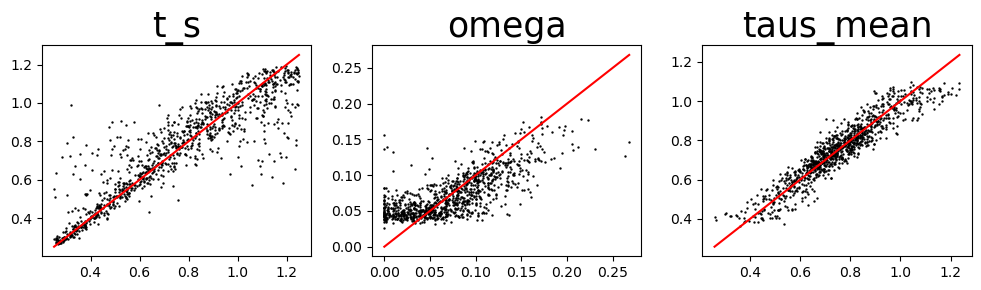

In [12]:
rgr.plot_cv_predictions(figdims=(1,3), figsize=(10,3))

In [15]:
rgr.r2

t_s          0.791037
omega        0.503358
taus_mean    0.882357
Name: R2, dtype: float64

In [ ]:
## Generating the 'mystery' msfs files

In [ ]:
import pandas

# Read in the sim file and split it into focal params and msfss
sims = pd.read_csv("default_PTA/MG-Snakes-SIMOUT.csv", sep=" ").iloc[:20, :]
true_values = sims[["zeta_e", "t_s", "taus_mean"]]
# Learned by experimentation
msfs_idx = 23
msfss = sims.iloc[:, msfs_idx:] 

# Writing param values from a df to a file with index values
with open("true-values.txt", 'w') as outfile:
    outfile.write("idx\tzeta_e\tt_s\ttaus_mean\n")
    outfile.write("\n".join(["{idx}\t{zeta_e}\t{t_s}\t{taus_mean}".format(idx=idx,
                                                                          zeta_e=x.zeta_e,
                                                                          t_s=x.t_s,
                                                                          taus_mean=x.taus_mean) for idx, x in true_values.iterrows()]))

# Writing simulated msfs in proper format to a file with corresponding index
import os
os.mkdir("sim-msfs")
for idx in range(len(msfss)):
    msfs = pd.DataFrame(msfss.iloc[idx])
    msfs.T.to_csv("sim-msfs/msfs-{idx}.csv".format(idx=idx), index=False, sep=" ")